# First We need to Load Ram Demo and split it into Train and Test Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ram_demo',sep=',')
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Age of Outlet
0,0,FDA15,249.8092,3735.1380,4,0.016047,9.30,9,0,1,1,train,17
1,1,DRC01,48.2692,443.4228,14,0.019278,5.92,3,2,1,2,train,7
2,0,FDN15,141.6180,2097.2700,10,0.016760,17.50,9,0,1,1,train,17
3,1,FDX07,182.0950,732.3800,6,0.000000,19.20,0,2,1,0,train,18
4,0,NCD19,53.8614,994.7052,9,0.000000,8.93,1,2,0,1,train,29


In [3]:
# Split data back into train and test
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
train.columns.tolist()

['Item_Fat_Content',
 'Item_Identifier',
 'Item_MRP',
 'Item_Outlet_Sales',
 'Item_Type',
 'Item_Visibility',
 'Item_Weight',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type',
 'Age of Outlet']

In [5]:
train['Item_Outlet_Sales'].head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# Decide what variables you will use in predicting target in Model

In [6]:
 ## list of features and target
features=['Item_Weight','Item_Visibility','Outlet_Type','Item_MRP','Outlet_Identifier','Age of Outlet','Outlet_Size','Outlet_Location_Type','Outlet_Type'] 
target=['Item_Outlet_Sales']

# Let's Select Linear Regression to build our First Model - Remember that the results are not important but the Technique is for Learning How to Model

In [7]:
### Import SKLEARN Libraries to use the Linear Model for regression
from sklearn import linear_model
from sklearn import cross_validation  ## 

In [8]:
############### Split the Train Data into Test and Train using a 70/30 split
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train[features],train[target], test_size=0.30, random_state=0)

In [9]:
model = linear_model.LinearRegression() ### Create linear regression object
model.fit(X_train, y_train) ## Build or Train or Fit the model to the "train" data set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Test the "Fit" of the Model's Predicted Values to Actual Target Values using R-sq (R2 is a measure of how much of the variance in y is explained by the model)

In [10]:
Rsq = model.score(X_test, y_test)  ### scoring = 'R sq of the Linear Model'
Rsq

0.51643830176078331

# Do Cross Validation to provide you R-sq from multiple executions of the same model using Train data split into Test and Train data sets

In [11]:
scores = cross_validation.cross_val_score(model, train[features],train[target], cv=5)
scores

array([ 0.39982239,  0.51359455,  0.52821235,  0.36372256,  0.25895459])

# Once you are confident that the Model is working, then predict on actual Test data that you had preserved

In [12]:
predictions = model.predict(test[features])
predictions[:5]

array([[ 2238.23226643],
       [ 1199.18706881],
       [ 2365.94452756],
       [ 2179.39061173],
       [ 3841.91707557]])

# Next we will use a Decision Tree to build our second Model

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
model = tree.DecisionTreeRegressor(max_depth=5)

In [15]:
model.fit(X_train, y_train) ## fit train/fit the model on the train dataset
model.score(X_test, y_test) ## test/validate on the test dataset

0.22756851884331553

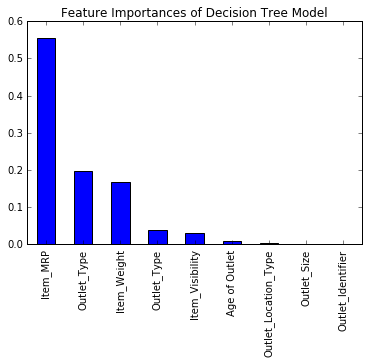

In [16]:
coef1 = pd.Series(model.feature_importances_, features).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances of Decision Tree Model')

In [17]:
scores = cross_validation.cross_val_score(model, train[features],train[target], cv=5)
scores

array([ 0.41628598, -0.09152701,  0.34354864,  0.26656897,  0.09482808])

In [18]:
predictions = model.predict(test[features])
predictions[:5]

array([ 1523.3504    ,  1090.5804    ,   184.4266    ,  3520.21776   ,
        3031.26634545])

In [19]:
# At this point do the example from 
#   http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#example-tree-plot-tree-regression-py
### DON"T  FORGET TO ADD A LINE: %matplotlib inline BEFORE RUNNING IT!!!!!

# Finally we will use the Random Forest Technique to build our Third Model

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
## create an empty RF Model
model = RandomForestRegressor(n_estimators=50,criterion='mse',max_depth=4,
                              min_samples_split=3,verbose=0,
                           random_state=0) 

In [22]:
model.fit(X_train, y_train) ## Fit/Train the model on train dataset
model.score(X_test, y_test) ## Test the model on test dataset

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


0.47141055699064255

In [23]:
scores = cross_validation.cross_val_score(model, train[features],train[target], cv=5) 
print("Mean of R Squared: %0.2f with std dev (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Mean of R Squared: 0.42 with std dev (+/- 0.15)


C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


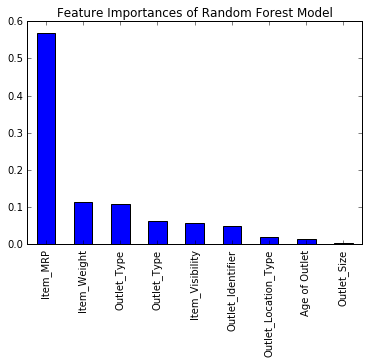

In [24]:
coef2 = pd.Series(model.feature_importances_, features).sort_values(ascending=False)
coef2.plot(kind='bar', title='Feature Importances of Random Forest Model')

# Classification Model - An Example

In [25]:
# Decision Tree Classifier
import pandas as pd

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# load the iris datasets
dataset = load_iris()
# fit a Classification and Regression Tree (CART) model 
model = DecisionTreeClassifier()
model.fit(dataset.data, dataset.target)
print(model)
# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)
# summarize the fit of the model
print('\n                      Classification Summary \n', 
      metrics.classification_report(expected, predicted))
print('Confusion Matrix \n', metrics.confusion_matrix(expected, predicted))


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
('\n                      Classification Summary \n', '             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00        50\n          1       1.00      1.00      1.00        50\n          2       1.00      1.00      1.00        50\n\navg / total       1.00      1.00      1.00       150\n')
('Confusion Matrix \n', array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]]))
